In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_test=pd.read_csv('test.csv')

In [6]:
sample_sub=pd.read_csv('sample_submission.csv')

In [7]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [9]:
sample_sub.tail()

,id,Response
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0
127036,508146,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
id                      127037 non-null int64
Gender                  127037 non-null object
Age                     127037 non-null int64
Driving_License         127037 non-null int64
Region_Code             127037 non-null float64
Previously_Insured      127037 non-null int64
Vehicle_Age             127037 non-null object
Vehicle_Damage          127037 non-null object
Annual_Premium          127037 non-null float64
Policy_Sales_Channel    127037 non-null float64
Vintage                 127037 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [13]:
df_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [14]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [15]:
df_train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [16]:
veh_age={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

In [17]:
df=pd.concat([df_train,df_test])

C:\Users\Rajneesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x:veh_age[x])

In [19]:
df['Vehicle_Damage'].value_counts()

Yes    256248
No     251898
Name: Vehicle_Damage, dtype: int64

In [20]:
veh_dummies=pd.get_dummies(df['Vehicle_Damage'])

In [21]:
df.drop('Vehicle_Damage',axis=1,inplace=True)
df=pd.concat([df,veh_dummies],axis=1)

In [22]:
gen_dummy=pd.get_dummies(df['Gender'])

In [23]:
df.drop('Gender',axis=1,inplace=True)
df=pd.concat([df,gen_dummy],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 14 columns):
Age                     508146 non-null int64
Annual_Premium          508146 non-null float64
Driving_License         508146 non-null int64
Policy_Sales_Channel    508146 non-null float64
Previously_Insured      508146 non-null int64
Region_Code             508146 non-null float64
Response                381109 non-null float64
Vehicle_Age             508146 non-null int64
Vintage                 508146 non-null int64
id                      508146 non-null int64
No                      508146 non-null uint8
Yes                     508146 non-null uint8
Female                  508146 non-null uint8
Male                    508146 non-null uint8
dtypes: float64(4), int64(6), uint8(4)
memory usage: 44.6 MB


In [25]:
df_train=df[df['id']<381110]

In [26]:
df_test=df[df['id']>=381110]

In [27]:
df_train.drop('id',axis=1,inplace=True)

C:\Users\Rajneesh\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
df_test.drop('id',axis=1,inplace=True)

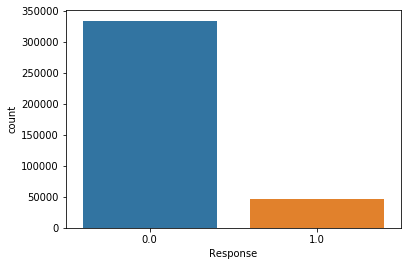

In [29]:
sns.countplot(df_train['Response'])

In [30]:
df_train['Response'].value_counts()[1]*100/len(df_train['Response'])

12.256336113815207

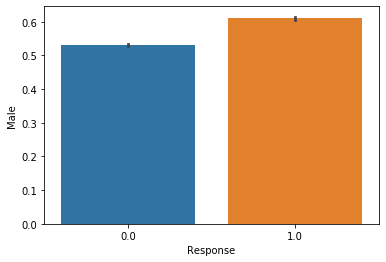

In [31]:
sns.barplot(df_train['Response'],y=df_train['Male'])

Here "Yes" is whether  Customer got his/her vehicle damaged in the past or not. It is an important one as it will tell us how was the customer's experience with the company

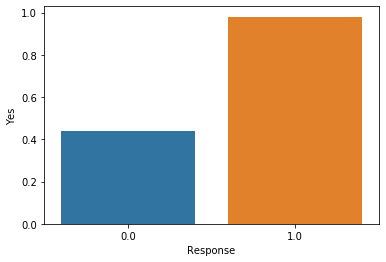

In [32]:
sns.barplot(df_train['Response'],df_train['Yes'])

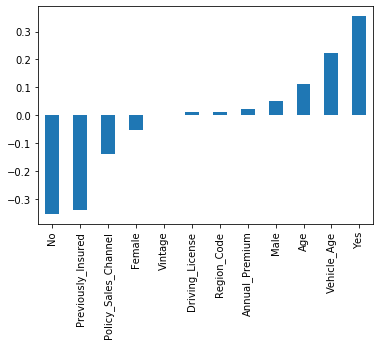

In [33]:
df_train.corr()['Response'].sort_values()[:-1].plot(kind='bar')

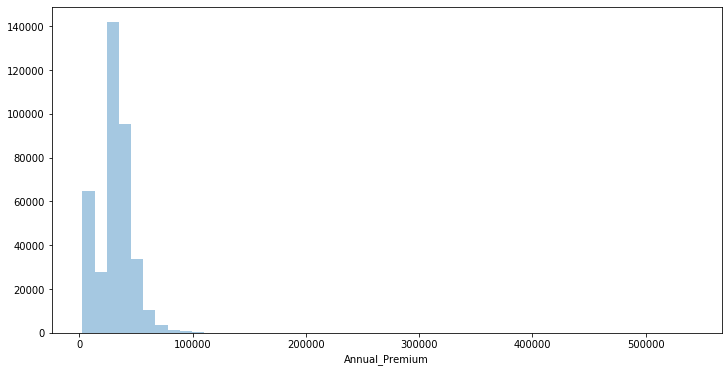

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(df_train['Annual_Premium'],kde=False)

In [35]:
df['Annual_Premium'].describe()

count    508146.000000
mean      30554.453041
std       17146.574625
min        2630.000000
25%       24381.000000
50%       31661.000000
75%       39403.750000
max      540165.000000
Name: Annual_Premium, dtype: float64

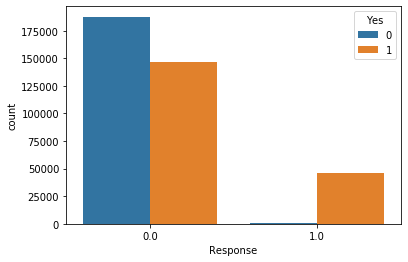

In [36]:
sns.countplot(df['Response'],hue=df['Yes'])

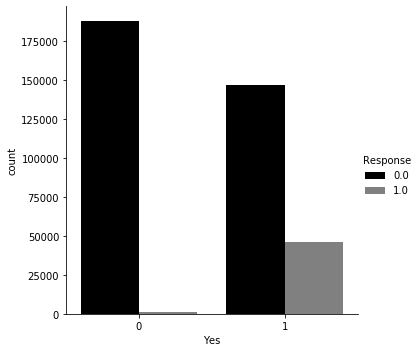

In [37]:
sns.catplot("Yes", hue="Response", data=df_train, kind="count",palette={1:"grey", 0:"black"})

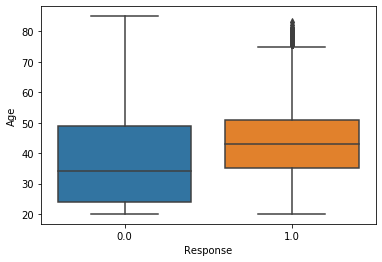

In [38]:
sns.boxplot(y=df_train['Age'],x=df_train['Response'])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=df_train.drop('Response',axis=1)
y=df_train['Response']

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
cross_val_score(lr,X,y,scoring='roc_auc')

C:\Users\Rajneesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rajneesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

array([0.59593446, 0.63469416, 0.82269196, 0.63723348, 0.68957435])

# Random Forest Classifier - Best ROC_AUC Score

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf=RandomForestClassifier()

In [47]:
clf.fit(X,y)

RandomForestClassifier()

In [48]:
cross_val_score(clf,X,y,scoring='roc_auc')

array([0.83394577, 0.83429096, 0.83191221, 0.83389771, 0.83117881])

In [49]:
rfc=RandomForestClassifier(n_estimators=289,
 min_samples_split=4,
 min_samples_leaf=9,
 max_features='auto',
 max_depth= 71,
 bootstrap='True')

In [50]:
cross_val_score(rfc,X,y,scoring='roc_auc')

array([0.85496899, 0.85471058, 0.85277721, 0.85348821, 0.85204416])

In [51]:
from sklearn.model_selection import cross_val_predict

In [52]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap='True', max_depth=71, min_samples_leaf=9,
                       min_samples_split=4, n_estimators=289)

In [53]:
predictions=rfc.predict(df_test.drop('Response',axis=1))

In [54]:
sample_sub['Response']=pd.Series(predictions)

In [55]:
sample_sub['Response'].value_counts()

0.0    126561
1.0       476
Name: Response, dtype: int64

In [128]:
pred=rfc.predict_proba(df_test.drop('Response',axis=1))

In [138]:
abc=pred[:,1]

In [139]:
sample_sub['Response']=pd.Series(abc)

In [141]:
sample_sub.to_csv('sub_again.csv',index=False)

# Logistic Regression with SMOTE

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
X_sm=df_train.drop('Response',axis=1)
y_sm=df_train['Response']

In [60]:
sm=SMOTE()

In [62]:
X_sm,y_sm=sm.fit_sample(X_sm,y_sm)

In [63]:
cross_val_score(lr,X_sm,y_sm,scoring='roc_auc')

C:\Users\Rajneesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Rajneesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

array([0.65641271, 0.89111302, 0.85652432, 0.65427808, 0.64860395])

In [66]:
lr.fit(X_sm,y_sm)

C:\Users\Rajneesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [67]:
prediction=lr.predict(df_test.drop('Response',axis=1))

In [142]:
prediction

array([0., 1., 1., ..., 0., 0., 0.])

In [70]:
proba_pred=lr.predict_proba(df_test.drop('Response',axis=1))

In [153]:
proba=proba_pred[:,1:]

In [154]:
sample_sub['Response']=proba

In [156]:
sample_sub.to_csv('sub_prob1.csv',index=False)

# XGBoost

In [158]:
import xgboost as xgb

In [159]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [160]:
cross_val_score(xg_cl,X_sm,y_sm,scoring='roc_auc')

array([0.87391297, 0.96385306, 0.96270264, 0.96755381, 0.96548714])

In [161]:
cross_val_score(xg_cl,X,y,scoring='roc_auc')

array([0.85313672, 0.85410065, 0.85338017, 0.85338045, 0.85272665])

In [162]:
xg_cl.fit(X_sm,y_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [163]:
proba_xgb=xg_cl.predict_proba(df_test.drop('Response',axis=1))

In [166]:
proba_xgb1=proba_xgb[:,1:]

In [176]:
proba_xgb2=proba_xgb1.reshape((127037,))

In [177]:
sample_sub['Response']=pd.Series(proba_xgb2)

In [179]:
sample_sub.to_csv('xgb_proba.csv',index=False)

In [180]:
xg_cl1 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123,max_depth=3,learning_rate=0.01,subsample=0.08,gamma=1)

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

In [183]:
eval_set=[(X_train,y_train),(X_test,y_test)]

In [184]:
eval_metric=['auc','error']

In [185]:
xg_cl1.fit(X_train,y_train,eval_set=eval_set,eval_metric=eval_metric,verbose=True)

[0]	validation_0-auc:0.88479	validation_0-error:0.20286	validation_1-auc:0.88680	validation_1-error:0.19989
[1]	validation_0-auc:0.88479	validation_0-error:0.20286	validation_1-auc:0.88680	validation_1-error:0.19989
[2]	validation_0-auc:0.88485	validation_0-error:0.20286	validation_1-auc:0.88687	validation_1-error:0.19989
[3]	validation_0-auc:0.88485	validation_0-error:0.20286	validation_1-auc:0.88687	validation_1-error:0.19989
[4]	validation_0-auc:0.88485	validation_0-error:0.20286	validation_1-auc:0.88687	validation_1-error:0.19989
[5]	validation_0-auc:0.88485	validation_0-error:0.20286	validation_1-auc:0.88687	validation_1-error:0.19989
[6]	validation_0-auc:0.88485	validation_0-error:0.20286	validation_1-auc:0.88687	validation_1-error:0.19989
[7]	validation_0-auc:0.89653	validation_0-error:0.19990	validation_1-auc:0.89888	validation_1-error:0.19683
[8]	validation_0-auc:0.90203	validation_0-error:0.19352	validation_1-auc:0.90442	validation_1-error:0.19031
[9]	validation_0-auc:0.90201

[76]	validation_0-auc:0.91225	validation_0-error:0.18726	validation_1-auc:0.91420	validation_1-error:0.18436
[77]	validation_0-auc:0.91221	validation_0-error:0.18726	validation_1-auc:0.91416	validation_1-error:0.18436
[78]	validation_0-auc:0.91221	validation_0-error:0.18726	validation_1-auc:0.91416	validation_1-error:0.18436
[79]	validation_0-auc:0.91221	validation_0-error:0.18726	validation_1-auc:0.91416	validation_1-error:0.18436
[80]	validation_0-auc:0.91224	validation_0-error:0.18726	validation_1-auc:0.91419	validation_1-error:0.18436
[81]	validation_0-auc:0.91224	validation_0-error:0.18726	validation_1-auc:0.91420	validation_1-error:0.18436
[82]	validation_0-auc:0.91221	validation_0-error:0.18726	validation_1-auc:0.91417	validation_1-error:0.18436
[83]	validation_0-auc:0.91218	validation_0-error:0.18726	validation_1-auc:0.91415	validation_1-error:0.18436
[84]	validation_0-auc:0.91225	validation_0-error:0.18726	validation_1-auc:0.91420	validation_1-error:0.18436
[85]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=0.08, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [189]:
proba_xgb_tun=xg_cl1.predict_proba(df_test.drop('Response',axis=1))

In [194]:
save=proba_xgb_tun[:,1:].reshape((127037,))

In [195]:
sample_sub['Response']=save

In [196]:
sample_sub.to_csv('XGB_tune1.csv',index=False)

In [197]:
sample_sub

,id,Response
0,381110,0.183877
1,381111,0.623671
2,381112,0.623671
3,381113,0.367872
4,381114,0.183877
...,...,...
127032,508142,0.183877
127033,508143,0.580226
127034,508144,0.183877
127035,508145,0.183877


In [199]:
feat_imp=xg_cl1.feature_importances_

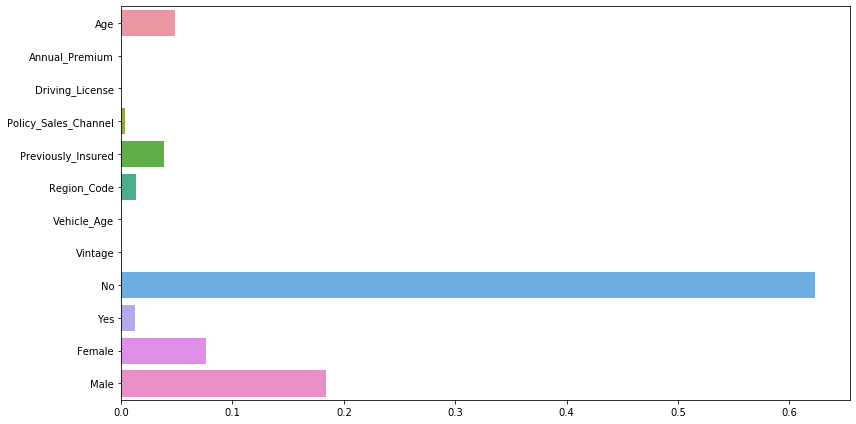

In [204]:
plt.figure(figsize=(12,6))
sns.barplot(y=df_train.drop('Response',axis=1).columns,x=feat_imp)
plt.tight_layout()

In [205]:
feat_imp

array([4.8582546e-02, 2.3341589e-04, 0.0000000e+00, 3.3305669e-03,
       3.8700070e-02, 1.3161370e-02, 0.0000000e+00, 1.2436537e-04,
       6.2300372e-01, 1.2256129e-02, 7.6431297e-02, 1.8417659e-01],
      dtype=float32)

2 Features are of zero importance

# Light GBM

In [206]:
import lightgbm as lgb

Not doing hyper parameter tuning as it will require lot of computational time

In [212]:
params = {}
params['learning_rate'] = 0.06
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'binary'
params['boosting_type'] = 'goss'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1

In [213]:
clf=lgb.LGBMClassifier(**params)

In [214]:
df_train.columns

Index(['Age', 'Annual_Premium', 'Driving_License', 'Policy_Sales_Channel',
       'Previously_Insured', 'Region_Code', 'Response', 'Vehicle_Age',
       'Vintage', 'No', 'Yes', 'Female', 'Male'],
      dtype='object')

In [215]:
df_train.head()

,Age,Annual_Premium,Driving_License,Policy_Sales_Channel,Previously_Insured,Region_Code,Response,Vehicle_Age,Vintage,No,Yes,Female,Male
0,44,40454.0,1,26.0,0,28.0,1.0,2,217,0,1,0,1
1,76,33536.0,1,26.0,0,3.0,0.0,1,183,1,0,0,1
2,47,38294.0,1,26.0,0,28.0,1.0,2,27,0,1,0,1
3,21,28619.0,1,152.0,1,11.0,0.0,0,203,1,0,0,1
4,29,27496.0,1,152.0,1,41.0,0.0,0,39,1,0,1,0


In [216]:
clf.fit(X_train,y_train,early_stopping_rounds=100,eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric='multi_error',verbose=True,categorical_feature=['Driving_License','Previously_Insured','Vehicle_Age','No', 'Yes', 'Female', 'Male'])

[1]	training's binary_error: 0.173959	training's binary_logloss: 0.660218	valid_1's binary_error: 0.172398	valid_1's binary_logloss: 0.660071
Training until validation scores don't improve for 100 rounds
[2]	training's binary_error: 0.157904	training's binary_logloss: 0.633562	valid_1's binary_error: 0.157541	valid_1's binary_logloss: 0.633303
[3]	training's binary_error: 0.154463	training's binary_logloss: 0.608607	valid_1's binary_error: 0.151243	valid_1's binary_logloss: 0.608119
[4]	training's binary_error: 0.152086	training's binary_logloss: 0.58766	valid_1's binary_error: 0.1493	valid_1's binary_logloss: 0.587074
[5]	training's binary_error: 0.152589	training's binary_logloss: 0.568039	valid_1's binary_error: 0.149635	valid_1's binary_logloss: 0.567347
[6]	training's binary_error: 0.148882	training's binary_logloss: 0.546097	valid_1's binary_error: 0.146241	valid_1's binary_logloss: 0.545265
[7]	training's binary_error: 0.149395	training's binary_logloss: 0.53027	valid_1's binary

[59]	training's binary_error: 0.132541	training's binary_logloss: 0.279531	valid_1's binary_error: 0.130881	valid_1's binary_logloss: 0.277197
[60]	training's binary_error: 0.132079	training's binary_logloss: 0.277788	valid_1's binary_error: 0.130324	valid_1's binary_logloss: 0.275458
[61]	training's binary_error: 0.131499	training's binary_logloss: 0.275939	valid_1's binary_error: 0.129708	valid_1's binary_logloss: 0.273605
[62]	training's binary_error: 0.131039	training's binary_logloss: 0.274967	valid_1's binary_error: 0.129345	valid_1's binary_logloss: 0.27265
[63]	training's binary_error: 0.130856	training's binary_logloss: 0.274119	valid_1's binary_error: 0.129005	valid_1's binary_logloss: 0.2718
[64]	training's binary_error: 0.130852	training's binary_logloss: 0.273097	valid_1's binary_error: 0.128924	valid_1's binary_logloss: 0.270787
[65]	training's binary_error: 0.130513	training's binary_logloss: 0.272303	valid_1's binary_error: 0.128756	valid_1's binary_logloss: 0.270004
[6

[117]	training's binary_error: 0.118268	training's binary_logloss: 0.236944	valid_1's binary_error: 0.117166	valid_1's binary_logloss: 0.234988
[118]	training's binary_error: 0.118102	training's binary_logloss: 0.236575	valid_1's binary_error: 0.117026	valid_1's binary_logloss: 0.234628
[119]	training's binary_error: 0.118056	training's binary_logloss: 0.236456	valid_1's binary_error: 0.117016	valid_1's binary_logloss: 0.234521
[120]	training's binary_error: 0.117647	training's binary_logloss: 0.235861	valid_1's binary_error: 0.116749	valid_1's binary_logloss: 0.23394
[121]	training's binary_error: 0.117663	training's binary_logloss: 0.235793	valid_1's binary_error: 0.116717	valid_1's binary_logloss: 0.233881
[122]	training's binary_error: 0.11737	training's binary_logloss: 0.235093	valid_1's binary_error: 0.116369	valid_1's binary_logloss: 0.233147
[123]	training's binary_error: 0.117203	training's binary_logloss: 0.234692	valid_1's binary_error: 0.116233	valid_1's binary_logloss: 0.2

[176]	training's binary_error: 0.110198	training's binary_logloss: 0.220933	valid_1's binary_error: 0.109527	valid_1's binary_logloss: 0.219349
[177]	training's binary_error: 0.11022	training's binary_logloss: 0.220893	valid_1's binary_error: 0.109536	valid_1's binary_logloss: 0.219327
[178]	training's binary_error: 0.109975	training's binary_logloss: 0.220697	valid_1's binary_error: 0.109377	valid_1's binary_logloss: 0.219127
[179]	training's binary_error: 0.109955	training's binary_logloss: 0.220531	valid_1's binary_error: 0.109305	valid_1's binary_logloss: 0.218969
[180]	training's binary_error: 0.109939	training's binary_logloss: 0.2205	valid_1's binary_error: 0.109305	valid_1's binary_logloss: 0.218957
[181]	training's binary_error: 0.109756	training's binary_logloss: 0.220227	valid_1's binary_error: 0.109083	valid_1's binary_logloss: 0.218671
[182]	training's binary_error: 0.109747	training's binary_logloss: 0.220193	valid_1's binary_error: 0.109078	valid_1's binary_logloss: 0.21

[235]	training's binary_error: 0.106243	training's binary_logloss: 0.213303	valid_1's binary_error: 0.105848	valid_1's binary_logloss: 0.212349
[236]	training's binary_error: 0.106152	training's binary_logloss: 0.213131	valid_1's binary_error: 0.105698	valid_1's binary_logloss: 0.212182
[237]	training's binary_error: 0.106076	training's binary_logloss: 0.213029	valid_1's binary_error: 0.105612	valid_1's binary_logloss: 0.212087
[238]	training's binary_error: 0.106085	training's binary_logloss: 0.212984	valid_1's binary_error: 0.105626	valid_1's binary_logloss: 0.212045
[239]	training's binary_error: 0.106009	training's binary_logloss: 0.212815	valid_1's binary_error: 0.105589	valid_1's binary_logloss: 0.211894
[240]	training's binary_error: 0.106007	training's binary_logloss: 0.212765	valid_1's binary_error: 0.105576	valid_1's binary_logloss: 0.211853
[241]	training's binary_error: 0.105976	training's binary_logloss: 0.212728	valid_1's binary_error: 0.105608	valid_1's binary_logloss: 0

[350]	training's binary_error: 0.103505	training's binary_logloss: 0.205936	valid_1's binary_error: 0.102907	valid_1's binary_logloss: 0.20625
[351]	training's binary_error: 0.103489	training's binary_logloss: 0.205876	valid_1's binary_error: 0.10288	valid_1's binary_logloss: 0.206201
[352]	training's binary_error: 0.103487	training's binary_logloss: 0.205856	valid_1's binary_error: 0.102952	valid_1's binary_logloss: 0.206188
[353]	training's binary_error: 0.103445	training's binary_logloss: 0.205757	valid_1's binary_error: 0.102884	valid_1's binary_logloss: 0.206107
[354]	training's binary_error: 0.103434	training's binary_logloss: 0.205737	valid_1's binary_error: 0.102893	valid_1's binary_logloss: 0.206106
[355]	training's binary_error: 0.103467	training's binary_logloss: 0.205713	valid_1's binary_error: 0.10293	valid_1's binary_logloss: 0.206092
[356]	training's binary_error: 0.103331	training's binary_logloss: 0.205641	valid_1's binary_error: 0.102794	valid_1's binary_logloss: 0.20

[409]	training's binary_error: 0.102737	training's binary_logloss: 0.203665	valid_1's binary_error: 0.102359	valid_1's binary_logloss: 0.20464
[410]	training's binary_error: 0.102728	training's binary_logloss: 0.203642	valid_1's binary_error: 0.102336	valid_1's binary_logloss: 0.204626
[411]	training's binary_error: 0.102744	training's binary_logloss: 0.203625	valid_1's binary_error: 0.102354	valid_1's binary_logloss: 0.204625
[412]	training's binary_error: 0.102726	training's binary_logloss: 0.203599	valid_1's binary_error: 0.10235	valid_1's binary_logloss: 0.204609
[413]	training's binary_error: 0.102715	training's binary_logloss: 0.203588	valid_1's binary_error: 0.102345	valid_1's binary_logloss: 0.204611
[414]	training's binary_error: 0.102699	training's binary_logloss: 0.20355	valid_1's binary_error: 0.102345	valid_1's binary_logloss: 0.204582
[415]	training's binary_error: 0.102659	training's binary_logloss: 0.203462	valid_1's binary_error: 0.102359	valid_1's binary_logloss: 0.20

[467]	training's binary_error: 0.101807	training's binary_logloss: 0.201778	valid_1's binary_error: 0.101987	valid_1's binary_logloss: 0.203367
[468]	training's binary_error: 0.101834	training's binary_logloss: 0.20174	valid_1's binary_error: 0.102024	valid_1's binary_logloss: 0.20334
[469]	training's binary_error: 0.101831	training's binary_logloss: 0.201732	valid_1's binary_error: 0.10201	valid_1's binary_logloss: 0.203343
[470]	training's binary_error: 0.101838	training's binary_logloss: 0.20172	valid_1's binary_error: 0.101942	valid_1's binary_logloss: 0.203341
[471]	training's binary_error: 0.101827	training's binary_logloss: 0.201677	valid_1's binary_error: 0.101987	valid_1's binary_logloss: 0.203306
[472]	training's binary_error: 0.1018	training's binary_logloss: 0.201664	valid_1's binary_error: 0.101965	valid_1's binary_logloss: 0.203302
[473]	training's binary_error: 0.101753	training's binary_logloss: 0.201599	valid_1's binary_error: 0.101946	valid_1's binary_logloss: 0.20324

LGBMClassifier(boosting_type='goss', colsample_bytree=0.7, learning_rate=0.06,
               max_depth=50, min_data_in_leaf=55, n_estimators=500,
               objective='binary', random_state=42, reg_alpha=1.6,
               reg_lambda=1.1, subsample=0.7)

In [217]:
proba_lgb=clf.predict_proba(df_test.drop('Response',axis=1))

In [224]:
abc=proba_lgb[:,1:].reshape((127037,))

In [225]:
sample_sub['Response']=abc

In [227]:
#sample_sub.to_csv('LGB.csv',index=False)

# Bayesian Optimization

In [242]:
#from sklearn.ensemble import RandomForestClassifier

In [243]:
#forest_clf=RandomForestClassifier()

In [2]:
'''
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False
        "max_depth": Integer(6, 20), # values of max_depth are integers from 6 to 20
        "max_features": Categorical(['auto', 'sqrt','log2']), 
        "min_samples_leaf": Integer(2, 10),
        "min_samples_split": Integer(2, 10),
        "n_estimators": Integer(100, 500)
    }

def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = forest_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.87:
        print('Interrupting!')
        return True

'''

'\nfrom skopt import BayesSearchCV\nfrom skopt.space import Real, Categorical, Integer\n\nsearch_space = {"bootstrap": Categorical([True, False]), # values for boostrap can be either True or False\n        "max_depth": Integer(6, 20), # values of max_depth are integers from 6 to 20\n        "max_features": Categorical([\'auto\', \'sqrt\',\'log2\']), \n        "min_samples_leaf": Integer(2, 10),\n        "min_samples_split": Integer(2, 10),\n        "n_estimators": Integer(100, 500)\n    }\n\ndef on_step(optim_result):\n    """\n    Callback meant to view scores after\n    each iteration while performing Bayesian\n    Optimization in Skopt"""\n    score = forest_bayes_search.best_score_\n    print("best score: %s" % score)\n    if score >= 0.87:\n        print(\'Interrupting!\')\n        return True\n\n'

In [3]:
#forest_bayes_search = BayesSearchCV(forest_clf, search_space, n_iter=32,scoring="accuracy", n_jobs=-1, cv=5)

In [ ]:
#forest_bayes_search.fit(X_train, y_train, callback=on_step) # callback=on_step will print score after each iteration

best score: 0.864131186759921


C:\Users\Rajneesh\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best score: 0.864131186759921
best score: 0.864131186759921
